In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
# Generate linear dataset
X_linear, y_linear = datasets.make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0,
                                                   random_state=42)

In [4]:
# Generate nonlinear dataset (circles)
X_nonlinear, y_nonlinear = datasets.make_circles(n_samples=100, factor=0.5, noise=0.1, random_state=42)

In [5]:
# Split the datasets into training and testing sets
X_linear_train, X_linear_test, y_linear_train, y_linear_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
X_nonlinear_train, X_nonlinear_test, y_nonlinear_train, y_nonlinear_test = train_test_split(X_nonlinear, y_nonlinear, test_size=0.2, random_state=42)

In [6]:
# Create SVM classifiers for linear and nonlinear datasets
linear_svm = SVC(kernel='linear', random_state=42)
nonlinear_svm = SVC(kernel='rbf', random_state=42)  # Radial Basis Function (RBF) kernel for nonlinear data

In [7]:
# Fit the classifiers to the training data
linear_svm.fit(X_linear_train, y_linear_train)
nonlinear_svm.fit(X_nonlinear_train, y_nonlinear_train)

SVC(random_state=42)

In [8]:
# Make predictions on the test data
linear_predictions = linear_svm.predict(X_linear_test)
nonlinear_predictions = nonlinear_svm.predict(X_nonlinear_test)

In [9]:
# Calculate accuracy
linear_accuracy = accuracy_score(y_linear_test, linear_predictions)
nonlinear_accuracy = accuracy_score(y_nonlinear_test, nonlinear_predictions)


In [10]:
# Visualize the decision boundaries
def plot_decision_boundary(X, y, model, title):
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

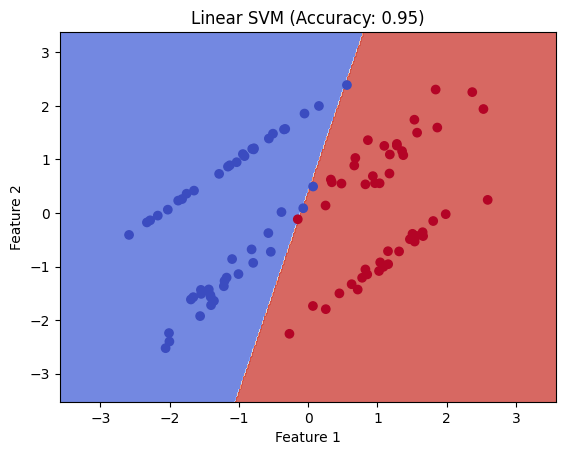

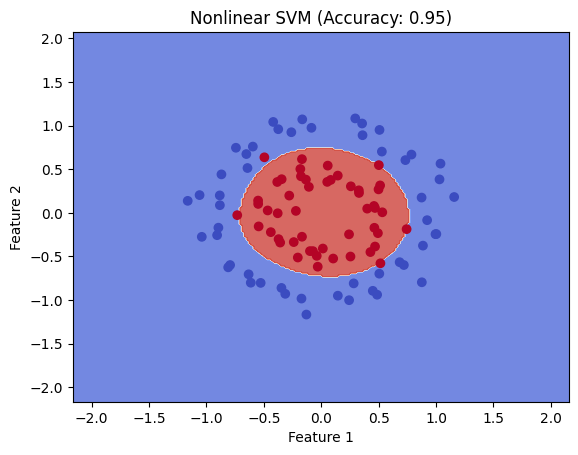

In [11]:
#Plot decesion boundaries
plot_decision_boundary(X_linear, y_linear, linear_svm, f'Linear SVM (Accuracy: {linear_accuracy:.2f})')
plot_decision_boundary(X_nonlinear, y_nonlinear, nonlinear_svm, f'Nonlinear SVM (Accuracy: {nonlinear_accuracy:.2f})')